In [29]:
import numpy as np       #import : python에 없는 기능(모듈,lib) 불러오기 as : alias(별칭)
import pandas as pd      #numpy : 배열,행렬,연산 다루는 라이브러리 Numerical Python
import matplotlib.pyplot as plt # pandas L 엑셀표(데이터 프레임) 라이브러리 (csv,엑셀,데이터 처리등)
#matplotlib : 그래프 그리기(시각화) 라이브러리 #소수점 3자리까지만 보겠다, 그래프는 코드 바로 아래에 바로 보여줘라

%precision 3 
%matplotlib inline  

In [25]:
df = pd.read_csv('../test/data/ch4_scores400.csv') # 이런걸 df라는 변수에 저장한다
#CSV = Comma-Separated Values
# 우리말로 하면 콤마로 구분된 값들.
scores = np.array(df['score']) # 특정열을 Numpy 배열로 변환 -> 그걸 scores 변수에 저장
scores[:10]  # scores -> 10개만 "순서대로" 꺼내기

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [26]:
# 복원추출 : 한 번 썻던 표본 또 뽑힐 수 있다(중복) 
np.random.choice([1,2,3], 3)

array([1, 3, 3])

In [27]:
# 비복원추출 : 한 번 썻던거 못 씀
np.random.choice([1,2,3],3,replace=False)

array([3, 2, 1])

In [31]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [32]:
np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()

70.400

In [33]:
scores.mean()

69.530

In [36]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 69.15
2번째 무작위 추출로 얻은 표본평균 69.5
3번째 무작위 추출로 얻은 표본평균 71.35
4번째 무작위 추출로 얻은 표본평균 69.4
5번째 무작위 추출로 얻은 표본평균 71.5


In [37]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [38]:
np.random.choice(dice, p=prob)

np.int64(5)

In [42]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob) 
sample

array([4, 4, 3, 5, 4, 4, 5, 6, 4, 6, 6, 2, 3, 4, 2, 4, 6, 5, 5, 5, 3, 4,
       5, 6, 5, 3, 1, 5, 1, 4, 5, 6, 2, 4, 1, 4, 5, 3, 3, 2, 5, 5, 5, 6,
       1, 5, 5, 5, 6, 1, 5, 6, 5, 4, 6, 2, 4, 5, 5, 2, 3, 4, 5, 6, 5, 2,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 1, 3, 4, 6, 4, 3, 6, 4, 6, 3, 5, 4, 2,
       5, 3, 1, 2, 2, 6, 6, 6, 5, 5, 4, 6])

In [43]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
             index = pd.Index(np.arange(1,7),name='dice'))

,frequency,relative frequency
dice,,
1,7,0.07
2,10,0.10
3,11,0.11
4,19,0.19
5,28,0.28
6,25,0.25


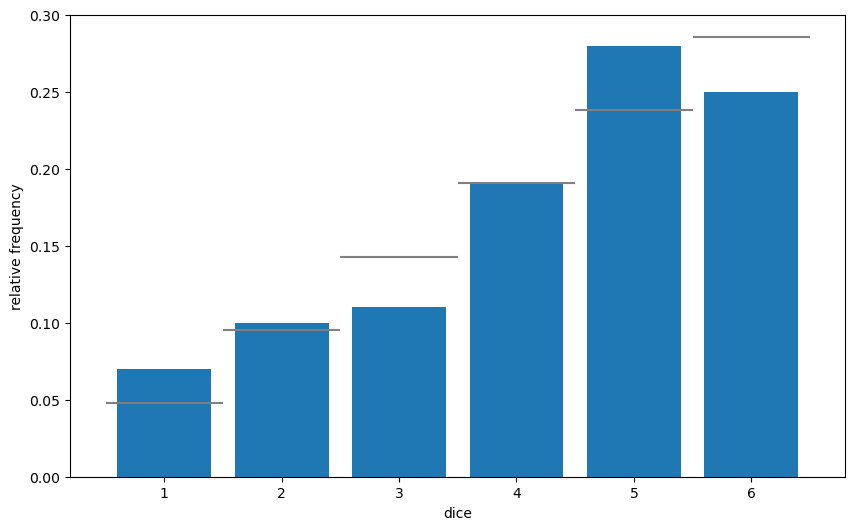

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시

ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]

ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()


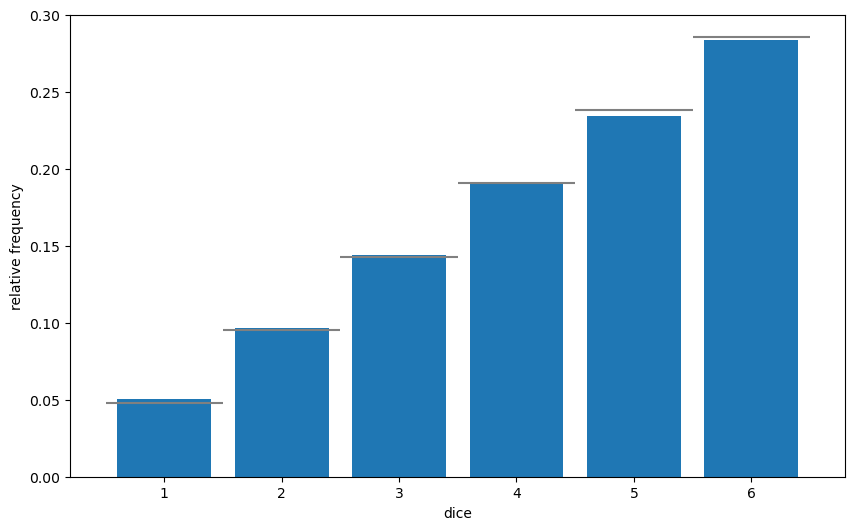

In [45]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


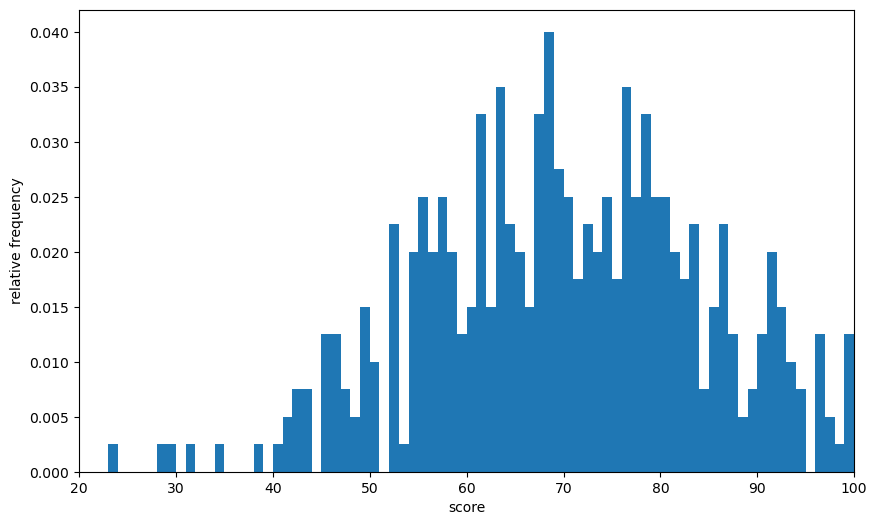

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


In [47]:
np.random.choice(scores)


np.int64(63)

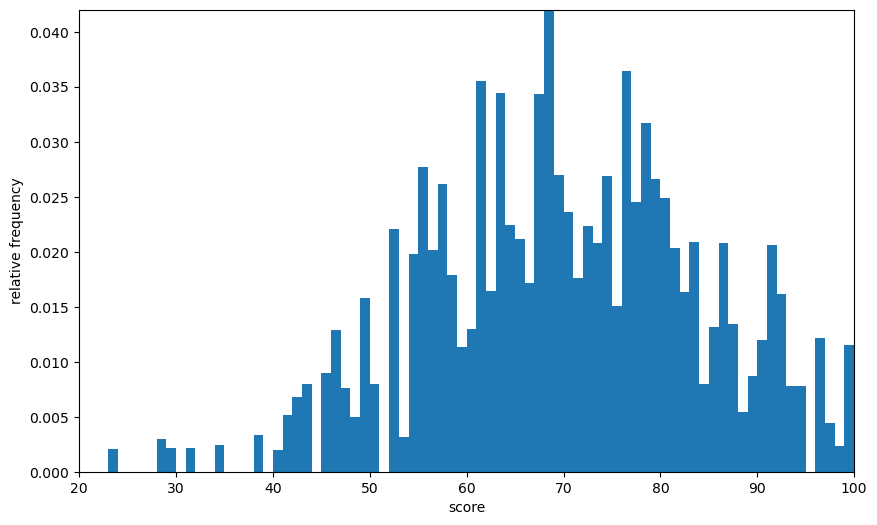

In [48]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


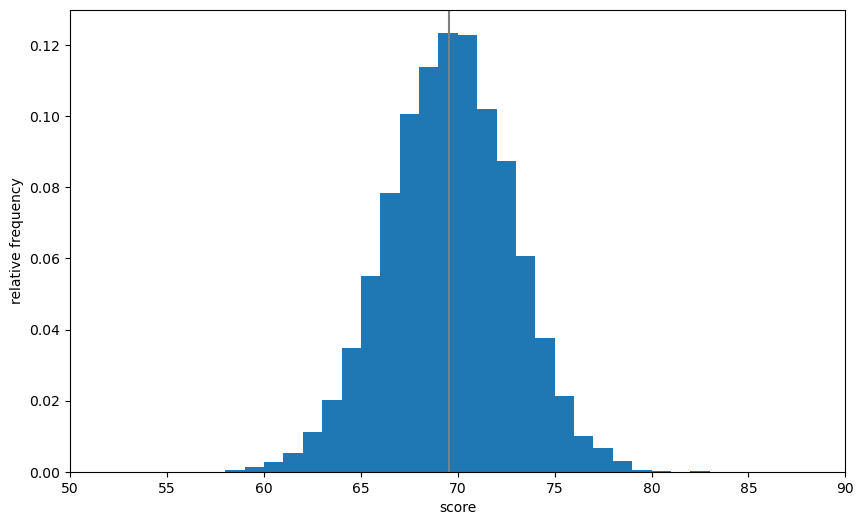

In [49]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()
